In [27]:
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import scipy.sparse as sparse
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
import cv2

arraysize = 200

col = np.array([159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234,159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234])
row = np.array([23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965,23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965])
data = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
image = sparse.coo_matrix((data, (row,col)),shape=(arraysize, arraysize), dtype=float).toarray()

#image = np.zeros((50,50))
#image[10:40, 10:40] = np.eye(30)
plt.imshow(image, origin='lower')

img_shape = image.shape

x_max = img_shape[0]
y_max = img_shape[1]

theta_max = 1.0 * math.pi 
theta_min = 0.0

r_min = 0.0
r_max = math.hypot(x_max, y_max)
print('r_max',r_max)

r_dim = arraysize 
theta_dim = arraysize

hough_space = np.zeros((r_dim,theta_dim), dtype='f')

for x in range(x_max):
    for y in range(y_max):
        if image[x,y] == 255: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # print('ir',ir)
            # print('itheta',itheta)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

# plt.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,20)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,20)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')

plt.imshow(hough_space, origin='lower')

neighborhood_size = hough_space.size/1000
print('neighborhood_size',neighborhood_size)
# for neighborhood_size in range(10,300):
#     print('neighborhood_size',neighborhood_size)
# # neighborhood_size = 200   fairly good
threshold = 3             #fairly good, no effect changing from 1 through 10

data_min = ndimage.minimum_filter(hough_space, neighborhood_size)
data_max = ndimage.maximum_filter(hough_space, neighborhood_size)
maxima = (hough_space == data_max)

print('data_min',data_min)
print('data_max',data_max)
diff = ((data_max - data_min) > threshold)
print('diff',diff)
maxima[diff == 0] = 0

# print('data_max',data_max)
# print('data_min',data_min)
# print('maxima',maxima)

#labeled - An integer ndarray where each unique feature in input has a unique label in the returned array
labeled, num_objects = ndimage.label(maxima) # non-zero values in input are features, num_objects are features found
print('num_objects',num_objects)
# print('labeled',labeled)
#slices - A list of tuples, with each tuple containing N slices (with N the dimension of the input array). 
# Slices correspond to the minimal parallelepiped that contains the object. If a number is missing, None is returned instead of a slice.
slices = ndimage.find_objects(labeled) #Array containing objects defined by different labels. Labels with value 0 are ignored

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2
    y.append(y_center)

print('x_center',x_center)
print('y_center',y_center)
print('x',x)
print('y',y)
# plt.imshow(hough_space, origin='lower')
# plt.savefig('hough_space_i_j.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.plot(x,y, 'r+')
plt.figure()
print('len(x)',len(x))
print('len(y)',len(y))
#plt.savefig('hough_space_maximas.png', bbox_inches = 'tight')
#plt.savefig("hough_space_r_theta.png",bbox_inches='tight')

plt.close()

line_index = 1

i = y[0]
j = x[0]

# # print i,j

print('i',i)
print('j',j)
print('r_max',r_max)
print('r_dim',r_dim)
print('theta_max',theta_max)
print('theta_dim',theta_dim)

r = round( (1.0 * i * r_max ) / r_dim,1)
theta = round( (1.0 * j * theta_max) / theta_dim,1)

print('r', r)
print('theta', np.rad2deg(theta))

fig, ax = plt.subplots()

ax.imshow(image, origin='lower')

ax.autoscale(False)

# print('y_max',y_max)

px = []
py = []
for i in range(0, np.int64(r), 1):
   px.append(math.cos(theta) * i)
   py.append(math.sin(theta) * i)

# print('px',px)
# print('py',py)

ax.plot(px, py, 'r+', linewidth=1)
plt.show()

r_max 282.842712474619


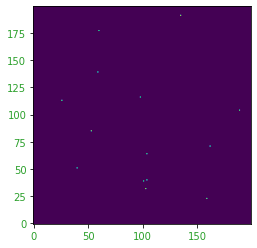

In [103]:
import numpy as np
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import scipy.sparse as sparse
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm
import cv2

col = np.array([159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234,159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234])
row = np.array([23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965,23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965])
data = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
image = sparse.coo_matrix((data, (row,col)),shape=(200, 200), dtype=float).toarray()
ax = plt.axes()
ax.set_facecolor('xkcd:blue')
ax.tick_params(labelcolor='tab:green')
fig = plt.figure(facecolor='white')
# fig.patch.set_facecolor('xkcd:mint green')
ax.imshow(image, origin='lower') #,cmap=plt.cm.Paired
#image = np.zeros((50,50))
#image[10:40, 10:40] = np.eye(30)
# plt.imshow(image, cmap=plt.cm.Paired, origin='lower')
# plt.show()
plt.close()

In [5]:
import numpy as np
hough_space = np.zeros((200,200), dtype='f')